In [41]:
from osgeo import gdal, gdalconst, osr
import numpy as np
import math
import rasterio as rio
import xarray as xr
import holoviews as hv
import hvplot.xarray
import netCDF4 as nc
import pandas as pd
import h5netcdf
import matplotlib.pyplot as plt
import rioxarray as rioxr
import os

In [2]:
landsat_filename = '/Users/spai/Downloads/lesotho/p169r082_TC_2015.tif'
emit_filename = '/Users/spai/Downloads/EMIT_L2A_RFL_001_20230124T091938_2302406_008.nc'
output_filename = '/Users/spai/Downloads/output.tif'

In [3]:
landsat = gdal.Open(landsat_filename, gdalconst.GA_ReadOnly)

In [4]:
emit_ds = gdal.Open(emit_filename, gdalconst.GA_ReadOnly)
emit_proj = emit_ds.GetProjection()
emit_geotrans = emit_ds.GetGeoTransform()
wide = emit_ds.RasterXSize
high = emit_ds.RasterYSize

In [5]:
warp_options = gdal.WarpOptions(
    format='GTiff',
    outputBounds=emit_geotrans[:4],
    outputBoundsSRS=emit_proj,
    width=wide,
    height=high,
    resampleAlg=gdalconst.GRA_NearestNeighbour
)

ERROR 1: Translating source or target SRS failed:



In [6]:
emit_geotrans

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [7]:
emit_geotrans[:4]

(0.0, 1.0, 0.0, 0.0)

In [8]:
emit_proj

''

In [9]:
emit_ds.GetSpatialRef()

In [10]:
print(emit_ds.GetSpatialRef())

None


In [11]:
wide

512

In [12]:
high

512

In [15]:
gdal.Open('/Users/spai/Downloads/EMIT_L2A_RFL_001_20230124T091938_2302406_008.nc')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x1104065b0> >

In [19]:
sr = osr.SpatialReference(emit_proj)

In [20]:
print(sr)

In [21]:
2+2

4

In [24]:
driver = emit_ds.GetDriver()
print(driver.ShortName, driver.LongName)

netCDF Network Common Data Format


In [25]:
emit_ds.GetProjectionRef()

''

In [26]:
emit_ds.GetMetadata_List()

['NC_GLOBAL#Conventions=CF-1.63',
 'NC_GLOBAL#creator_name=Jet Propulsion Laboratory/California Institute of Technology',
 'NC_GLOBAL#creator_url=https://earth.jpl.nasa.gov/emit/',
 'NC_GLOBAL#crosstrack_orientation=as seen on ground',
 'NC_GLOBAL#date_created=2023-02-28T12:21:13Z',
 'NC_GLOBAL#day_night_flag=Day',
 'NC_GLOBAL#easternmost_longitude=29.04603544257228',
 'NC_GLOBAL#flight_line=emit20230124t091938_o02406_s001',
 'NC_GLOBAL#geotransform={27.3531855143319,0.000542232520256367,-0,-31.0496423290378,-0,-0.000542232520256367}',
 'NC_GLOBAL#history=PGE Run Command: {python /beegfs/store/emit/ops/repos/emit-sds-l2a/spectrum_quality.py /tmp/emit/ops/emit20230124t091938_emit.L2AReflectance_20230125t165103/output/emit20230124t091938_rfl /tmp/emit/ops/emit20230124t091938_emit.L2AReflectance_20230125t165103/output/emit20230124t091938_rfl_quality.txt}, PGE Input Files: {radiance_file=/beegfs/store/emit/ops/data/acquisitions/20230124/emit20230124t091938/l1b/emit20230124t091938_o02406_s0

In [27]:
landsat.GetProjection()

'PROJCS["WGS 84 / UTM zone 35N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32635"]]'

In [29]:
print(landsat.GetSpatialRef())

PROJCS["WGS 84 / UTM zone 35N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",27],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32635"]]


In [30]:
ds = xr.open_dataset('/Users/spai/Downloads/EMIT_L2A_RFL_001_20230124T091938_2302406_008.nc')

In [31]:
ds

<xarray.Dataset>
Dimensions:      (downtrack: 2240, crosstrack: 1242, bands: 285)
Dimensions without coordinates: downtrack, crosstrack, bands
Data variables:
    reflectance  (downtrack, crosstrack, bands) float32 ...
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             -32.47462939227153
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [ 2.73531855e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [32]:
ds.attrs

{'ncei_template_version': 'NCEI_NetCDF_Swath_Template_v2.0',
 'summary': "The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\\n\\nThis file contains L2A estimated surface reflectances and geolocation data. Reflectance estimates are created

In [33]:
ds.attrs['spatial_ref']

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [38]:
warp_options = gdal.WarpOptions(
    format='GTiff',
    #outputBounds=emit_geotrans[:4],
    outputBoundsSRS=ds.attrs['spatial_ref'],
    width=wide,
    height=high,
    resampleAlg=gdalconst.GRA_NearestNeighbour
)

In [39]:
gdal.Warp(output_filename, landsat, options=warp_options)

Warning 1: -te_srs ignored since -te is not specified.


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x28c84bb70> >

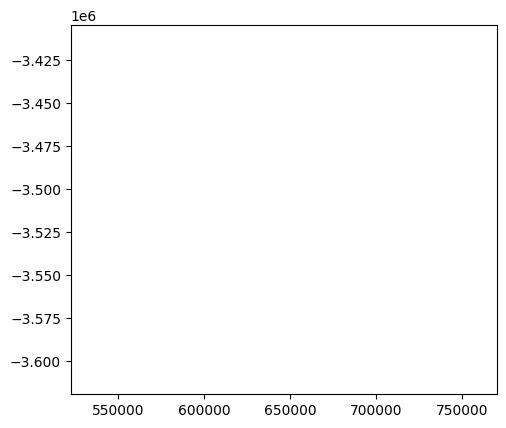

<Axes: >

In [44]:
result_image =rio.open(output_filename)
from rasterio.plot import show
show(result_image)

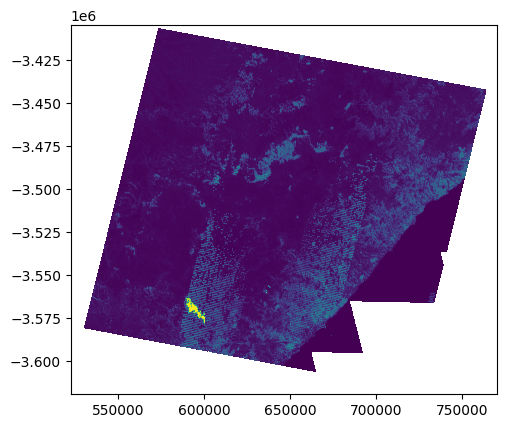

<Axes: >

In [45]:
landsat_image =rio.open(landsat_filename)
show(landsat_image)

In [46]:
emit_image =rio.open(emit_filename)
show(emit_image)

/opt/homebrew/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


IndexError: band index 1 out of range (not in ())